# Predict energy usage for the following year per month

[Data Wrangling](#DW) In this step, I familiarized myself with the dataset and identified potential issues I might encounter throughout the analysis.

[Exploratory Data Analysis](#EDA)  This step allowed me to refine my selection of predictor features, ultimately narrowing them down to one key variable. Take a look at the process behind this decision.


<a id="DW"></a>
# Data Wrangling 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Energy_consumption_dataset.csv")
data

Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0         1     0  Saturday      No    25.139433  43.431581    1565.693999   
1         1     1  Saturday      No    27.731651  54.225919    1411.064918   
2         1     2  Saturday      No    28.704277  58.907658    1755.715009   
3         1     3  Saturday      No    20.080469  50.371637    1452.316318   
4         1     4  Saturday      No    23.097359  51.401421    1094.130359   
...     ...   ...       ...     ...          ...        ...            ...   
4995     12     6    Sunday     Yes    26.338718  52.580000    1563.567259   
4996     12    17    Monday      No    20.007565  42.765607    1999.982252   
4997     12    13  Thursday     Yes    26.226253  30.015975    1999.982252   
4998     12     8  Saturday     Yes    24.673206  50.223939    1240.811298   
4999     12     1  Saturday     Yes    25.802872  41.798829    1793.658686   

      Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0             5        On           Off         2.774699          75.364373  
1             1        On            On        21.831384          83.401855  
2             2       Off           Off         6.764672          78.270888  
3             1       Off            On         8.623447          56.519850  
4             9        On           Off         3.071969          70.811732  
...         ...       ...           ...              ...                ...  
4995          7        On            On        20.591717          70.270344  
4996          5       Off            On         7.536319          73.943071  
4997          5       Off            On        28.162193          85.784613  
4998          2        On            On        20.918483          63.784001  
4999          6       Off           Off         8.334079          53.263278  

[5000 rows x 12 columns]

**Explore the dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
data.shape

(5000, 12)

In [5]:
data.dtypes

Month                  int64
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [6]:
data.isna().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

The data has no missing values. 

In [7]:
data.duplicated().unique()

array([False])

The data does not have any duplicate values 

**Exploring catgorical columns**

In [8]:
categoricals = data.select_dtypes(include = "object")
categoricals

DayOfWeek Holiday HVACUsage LightingUsage
0     Saturday      No        On           Off
1     Saturday      No        On            On
2     Saturday      No       Off           Off
3     Saturday      No       Off            On
4     Saturday      No        On           Off
...        ...     ...       ...           ...
4995    Sunday     Yes        On            On
4996    Monday      No       Off            On
4997  Thursday     Yes       Off            On
4998  Saturday     Yes        On            On
4999  Saturday     Yes       Off           Off

[5000 rows x 4 columns]

In [9]:
categoricals["DayOfWeek"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [10]:
categoricals["Holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
categoricals["HVACUsage"].unique()

array(['On', 'Off'], dtype=object)

In [12]:
categoricals["LightingUsage"].unique()

array(['Off', 'On'], dtype=object)

As we can see categorical data is very clean with no missing values.

**Exploring numerical columns**

In [13]:
numericals = data.select_dtypes(include = "int")
numericals

Month  Hour  Occupancy
0         1     0          5
1         1     1          1
2         1     2          2
3         1     3          1
4         1     4          9
...     ...   ...        ...
4995     12     6          7
4996     12    17          5
4997     12    13          5
4998     12     8          2
4999     12     1          6

[5000 rows x 3 columns]

These integer data type columns are actually categorical so computing a statistical summary would not be beneficial. 

In [14]:
numericals["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

This suggests the data is for 1 year of energy consumption records. 

In [15]:
numericals["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
numericals["Occupancy"].unique()

array([5, 1, 2, 9, 6, 8, 0, 4, 3, 7])

In [17]:
floats =  data.select_dtypes(include = "float")
floats

Temperature   Humidity  SquareFootage  RenewableEnergy  \
0       25.139433  43.431581    1565.693999         2.774699   
1       27.731651  54.225919    1411.064918        21.831384   
2       28.704277  58.907658    1755.715009         6.764672   
3       20.080469  50.371637    1452.316318         8.623447   
4       23.097359  51.401421    1094.130359         3.071969   
...           ...        ...            ...              ...   
4995    26.338718  52.580000    1563.567259        20.591717   
4996    20.007565  42.765607    1999.982252         7.536319   
4997    26.226253  30.015975    1999.982252        28.162193   
4998    24.673206  50.223939    1240.811298        20.918483   
4999    25.802872  41.798829    1793.658686         8.334079   

      EnergyConsumption  
0             75.364373  
1             83.401855  
2             78.270888  
3             56.519850  
4             70.811732  
...                 ...  
4995          70.270344  
4996          73.943071  
4997          85.784613  
4998          63.784001  
4999          53.263278  

[5000 rows x 5 columns]

In [18]:
floats.describe()

Temperature     Humidity  SquareFootage  RenewableEnergy  \
count  5000.000000  5000.000000    5000.000000      5000.000000   
mean     24.946823    45.478146    1507.403201        15.201195   
std       3.041678     8.972690     293.147209         9.157038   
min      20.007565    30.015975    1000.512661         0.006642   
25%      22.453790    38.111104    1253.906598         7.477928   
50%      24.831846    45.793124    1513.581105        15.343830   
75%      27.427281    52.696651    1754.846457        22.889997   
max      29.998671    59.969085    1999.982252        29.965327   

       EnergyConsumption  
count        5000.000000  
mean           76.794919  
std             9.231573  
min            53.263278  
25%            70.419588  
50%            76.696267  
75%            83.246274  
max            99.201120

**Since the dataset contains no missing values or duplicate data, we can confidently assume the summary statistic is accurate and representative. Notably, the standard deviations for SquareFootage is significantly larger relative to their respective means, indicating high variability. This suggests large differences in property sizes which aligns with the expectation that larger spaces and higher occupancy levels lead to greater energy use.** 

**Looking for outliers**

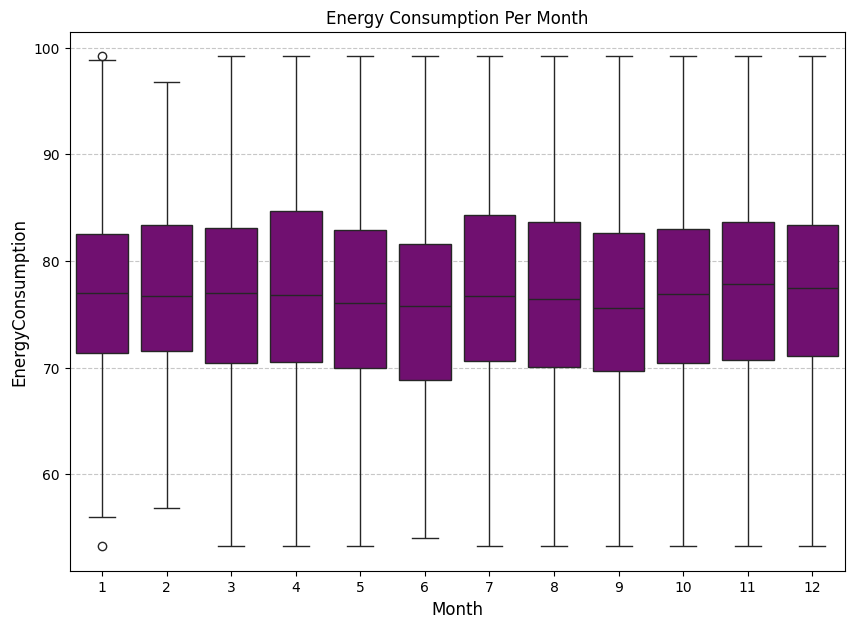

In [19]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.boxplot (x = "Month", y = "EnergyConsumption", data = data,  color="Purple")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Month", fontsize=12)
plt.ylabel("EnergyConsumption", fontsize=12)
plt.title("Energy Consumption Per Month",fontsize=12)
plt.show()

**This box plot is demonstrating that month 1 is potentionally the only month with outliers compared to the rest of the months. For the purpose of this project we will be keeping these outliers and not dropping them as they are crusial to predict energy consumptions. It is only a trend to keep an eye out for.**

### Exploring explanatory variables and target variable

**The target variable would be "EnergyConsumption" and my predictors would be Square Footage. Month, Hour, DayofWeek, Temperature, Humidity and Occupancy. Following there are some investigations done on some of these exploratory columns.**

In [20]:
consumptionmean_by_month = data.groupby("Month")["EnergyConsumption"].mean().sort_values()
consumptionmean_by_month

Month
6     75.659264
9     75.897811
5     76.202260
8     76.560807
10    76.678556
1     76.945109
3     76.990937
12    77.127935
7     77.251289
11    77.341956
2     77.377782
4     77.585987
Name: EnergyConsumption, dtype: float64

**Judging from the population in the dataset it looks like the month with the least energy consumption is June and the highest energy consumption month is April.**

In [21]:
occuancy_sqfootage = data.groupby(["Occupancy"])[["SquareFootage", "EnergyConsumption"]].mean().sort_values(by = "EnergyConsumption")
occuancy_sqfootage

SquareFootage  EnergyConsumption
Occupancy                                  
0            1512.761672          74.712218
1            1482.289568          75.166392
4            1540.708566          75.887569
2            1508.275765          76.101442
6            1522.818821          76.247514
3            1494.647371          76.555184
5            1483.757538          77.089554
7            1492.671646          78.220066
8            1527.335758          78.614895
9            1508.574410          78.972534

**But if we take another approach and judge per occupancy amount of people and square footage we can see a notably difference where energy consumption mean parameter go higher. This just demonstrates what we already knew the more people in a place the more energy consumption they use.**

**Distributions Of Feature Values**

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'Occupancy'}>],
       [<Axes: title={'center': 'RenewableEnergy'}>,
        <Axes: title={'center': 'EnergyConsumption'}>, <Axes: >]],
      dtype=object)

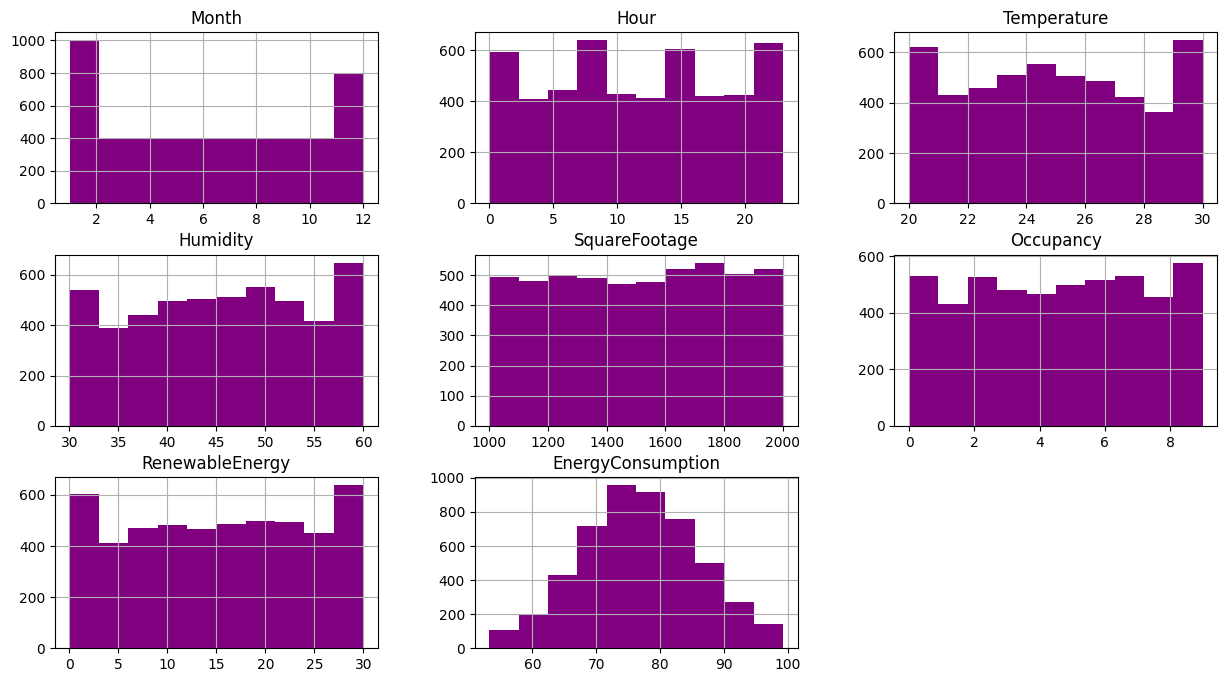

In [22]:
data.hist(figsize = (15,8), color="purple")


- Here we can see that in terms of frequency in the Month histogram January and December had the most records but earlier it was found that the month with the highest mean energy consumption for Month was April. Looking into these 3 months for trends would be beneficial.
- Energy consumption is the only feature in the dataset that follows a normal distribution. This indicates that most values cluster closely around the mean, with relatively few outliers, suggesting consistent and predictable patterns in energy usage across the dataset.

**Turning boolean columns into numerical categories**

In [23]:
data[["Holiday", "HVACUsage", "LightingUsage"]].head()

Holiday HVACUsage LightingUsage
0      No        On           Off
1      No        On            On
2      No       Off           Off
3      No       Off            On
4      No        On           Off

In [24]:
data["Holiday"] = data["Holiday"].map({"Yes": 1, "No": 0})


In [25]:
data["HVACUsage"]= data["HVACUsage"].map({"On": 1, "Off":0})

In [26]:
data["LightingUsage"] = data["LightingUsage"].map({"On":1, "Off": 0})

In [27]:
data.head(10)

Month  Hour DayOfWeek  Holiday  Temperature   Humidity  SquareFootage  \
0      1     0  Saturday        0    25.139433  43.431581    1565.693999   
1      1     1  Saturday        0    27.731651  54.225919    1411.064918   
2      1     2  Saturday        0    28.704277  58.907658    1755.715009   
3      1     3  Saturday        0    20.080469  50.371637    1452.316318   
4      1     4  Saturday        0    23.097359  51.401421    1094.130359   
5      1     5  Saturday        1    29.576037  36.824263    1871.709180   
6      1     6  Saturday        1    25.131167  35.709622    1607.001228   
7      1     7  Saturday        1    23.182844  31.679920    1633.955330   
8      1     8  Saturday        0    25.391999  46.399364    1240.309224   
9      1     9  Saturday        0    22.212549  32.418464    1705.420336   

   Occupancy  HVACUsage  LightingUsage  RenewableEnergy  EnergyConsumption  
0          5          1              0         2.774699          75.364373  
1          1          1              1        21.831384          83.401855  
2          2          0              0         6.764672          78.270888  
3          1          0              1         8.623447          56.519850  
4          9          1              0         3.071969          70.811732  
5          6          0              0        17.626690          84.321885  
6          6          1              0        24.264702          76.165791  
7          8          0              0        27.517099          74.131906  
8          6          1              0         2.307595          78.206236  
9          1          1              0        29.140071          77.992214

**Most machine learning algorithms work better with numerical data, converting boolean-like columns like "Yes"/"No" or "On"/"Off" into numeric values (1/0) makes them easier to process.**

<a id="EDA"></a>

# Exploratory Data Analysis


### Feature Engineering

In [28]:
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder



In [29]:
data.dtypes

Month                  int64
Hour                   int64
DayOfWeek             object
Holiday                int64
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage              int64
LightingUsage          int64
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

**The target variable would be "EnergyConsumption" and my predictors would be Square Footage. Month, Hour, DayofWeek, Temperature, Humidity and Occupancy. Following there are some investigations done on some of these exploratory columns.**

In [30]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder

OneHotEncoder(drop='first', sparse_output=False)

In [31]:
data_ecoded = encoder.fit_transform(data[["DayOfWeek"]])
data_ecoded

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [32]:
encoded_col_names = encoder.get_feature_names_out(["DayOfWeek"])
encoded_col_names

array(['DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday'],
      dtype=object)

In [33]:
encoded_df = pd.DataFrame(data_ecoded, columns=encoded_col_names)
encoded_df

DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
0                  0.0                 1.0               0.0   
1                  0.0                 1.0               0.0   
2                  0.0                 1.0               0.0   
3                  0.0                 1.0               0.0   
4                  0.0                 1.0               0.0   
...                ...                 ...               ...   
4995               0.0                 0.0               1.0   
4996               1.0                 0.0               0.0   
4997               0.0                 0.0               0.0   
4998               0.0                 1.0               0.0   
4999               0.0                 1.0               0.0   

      DayOfWeek_Thursday  DayOfWeek_Tuesday  DayOfWeek_Wednesday  
0                    0.0                0.0                  0.0  
1                    0.0                0.0                  0.0  
2                    0.0                0.0                  0.0  
3                    0.0                0.0                  0.0  
4                    0.0                0.0                  0.0  
...                  ...                ...                  ...  
4995                 0.0                0.0                  0.0  
4996                 0.0                0.0                  0.0  
4997                 1.0                0.0                  0.0  
4998                 0.0                0.0                  0.0  
4999                 0.0                0.0                  0.0  

[5000 rows x 6 columns]

In [34]:
data_encoded_fin = pd.concat([data.drop(["DayOfWeek"], axis=1), encoded_df], axis=1)
data_encoded_fin

Month  Hour  Holiday  Temperature   Humidity  SquareFootage  Occupancy  \
0         1     0        0    25.139433  43.431581    1565.693999          5   
1         1     1        0    27.731651  54.225919    1411.064918          1   
2         1     2        0    28.704277  58.907658    1755.715009          2   
3         1     3        0    20.080469  50.371637    1452.316318          1   
4         1     4        0    23.097359  51.401421    1094.130359          9   
...     ...   ...      ...          ...        ...            ...        ...   
4995     12     6        1    26.338718  52.580000    1563.567259          7   
4996     12    17        0    20.007565  42.765607    1999.982252          5   
4997     12    13        1    26.226253  30.015975    1999.982252          5   
4998     12     8        1    24.673206  50.223939    1240.811298          2   
4999     12     1        1    25.802872  41.798829    1793.658686          6   

      HVACUsage  LightingUsage  RenewableEnergy  EnergyConsumption  \
0             1              0         2.774699          75.364373   
1             1              1        21.831384          83.401855   
2             0              0         6.764672          78.270888   
3             0              1         8.623447          56.519850   
4             1              0         3.071969          70.811732   
...         ...            ...              ...                ...   
4995          1              1        20.591717          70.270344   
4996          0              1         7.536319          73.943071   
4997          0              1        28.162193          85.784613   
4998          1              1        20.918483          63.784001   
4999          0              0         8.334079          53.263278   

      DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  \
0                  0.0                 1.0               0.0   
1                  0.0                 1.0               0.0   
2                  0.0                 1.0               0.0   
3                  0.0                 1.0               0.0   
4                  0.0                 1.0               0.0   
...                ...                 ...               ...   
4995               0.0                 0.0               1.0   
4996               1.0                 0.0               0.0   
4997               0.0                 0.0               0.0   
4998               0.0                 1.0               0.0   
4999               0.0                 1.0               0.0   

      DayOfWeek_Thursday  DayOfWeek_Tuesday  DayOfWeek_Wednesday  
0                    0.0                0.0                  0.0  
1                    0.0                0.0                  0.0  
2                    0.0                0.0                  0.0  
3                    0.0                0.0                  0.0  
4                    0.0                0.0                  0.0  
...                  ...                ...                  ...  
4995                 0.0                0.0                  0.0  
4996                 0.0                0.0                  0.0  
4997                 1.0                0.0                  0.0  
4998                 0.0                0.0                  0.0  
4999                 0.0                0.0                  0.0  

[5000 rows x 17 columns]

### Inferential statistics - **Correlation**

In [35]:
data_encoded_fin.corr()

Month      Hour   Holiday  Temperature  Humidity  \
Month                1.000000  0.015178  0.011190     0.004330 -0.000315   
Hour                 0.015178  1.000000  0.011855    -0.008293  0.016410   
Holiday              0.011190  0.011855  1.000000     0.000017 -0.037460   
Temperature          0.004330 -0.008293  0.000017     1.000000 -0.024320   
Humidity            -0.000315  0.016410 -0.037460    -0.024320  1.000000   
SquareFootage        0.004142  0.017311 -0.038658     0.015372 -0.008551   
Occupancy           -0.011210 -0.012324  0.031150     0.011087  0.004232   
HVACUsage            0.011036 -0.011441 -0.014428     0.004243 -0.023583   
LightingUsage       -0.011840 -0.012726  0.013756    -0.011924  0.006524   
RenewableEnergy      0.001912  0.010373 -0.026405    -0.017275  0.015361   
EnergyConsumption   -0.007009 -0.014272  0.028278     0.535338 -0.057593   
DayOfWeek_Monday    -0.008688  0.001450 -0.001636    -0.011848 -0.006286   
DayOfWeek_Saturday   0.018960  0.025254  0.009723     0.019754  0.005193   
DayOfWeek_Sunday     0.001973  0.015881  0.010084    -0.001302  0.007368   
DayOfWeek_Thursday  -0.007881 -0.011980 -0.004646    -0.019553 -0.015911   
DayOfWeek_Tuesday   -0.013596 -0.020150 -0.011200     0.015709 -0.002236   
DayOfWeek_Wednesday -0.004500  0.011516  0.013239    -0.002901  0.034579   

                     SquareFootage  Occupancy  HVACUsage  LightingUsage  \
Month                     0.004142  -0.011210   0.011036      -0.011840   
Hour                      0.017311  -0.012324  -0.011441      -0.012726   
Holiday                  -0.038658   0.031150  -0.014428       0.013756   
Temperature               0.015372   0.011087   0.004243      -0.011924   
Humidity                 -0.008551   0.004232  -0.023583       0.006524   
SquareFootage             1.000000   0.010907   0.009087       0.001986   
Occupancy                 0.010907   1.000000   0.018308      -0.002785   
HVACUsage                 0.009087   0.018308   1.000000      -0.011602   
LightingUsage             0.001986  -0.002785  -0.011602       1.000000   
RenewableEnergy           0.015922   0.016608   0.009191      -0.013242   
EnergyConsumption         0.009470   0.139919   0.063065       0.005100   
DayOfWeek_Monday          0.023355  -0.012874  -0.005792      -0.012800   
DayOfWeek_Saturday       -0.009263  -0.000158   0.006192      -0.006899   
DayOfWeek_Sunday         -0.004749  -0.019826  -0.009712       0.015598   
DayOfWeek_Thursday       -0.018292  -0.014543   0.002850      -0.011762   
DayOfWeek_Tuesday        -0.004663   0.025876   0.001730      -0.020176   
DayOfWeek_Wednesday       0.019864   0.015014   0.017815       0.001797   

                     RenewableEnergy  EnergyConsumption  DayOfWeek_Monday  \
Month                       0.001912          -0.007009         -0.008688   
Hour                        0.010373          -0.014272          0.001450   
Holiday                    -0.026405           0.028278         -0.001636   
Temperature                -0.017275           0.535338         -0.011848   
Humidity                    0.015361          -0.057593         -0.006286   
SquareFootage               0.015922           0.009470          0.023355   
Occupancy                   0.016608           0.139919         -0.012874   
HVACUsage                   0.009191           0.063065         -0.005792   
LightingUsage              -0.013242           0.005100         -0.012800   
RenewableEnergy             1.000000           0.060490         -0.017383   
EnergyConsumption           0.060490           1.000000         -0.027052   
DayOfWeek_Monday           -0.017383          -0.027052          1.000000   
DayOfWeek_Saturday         -0.009458           0.023980         -0.167175   
DayOfWeek_Sunday            0.010375          -0.009584         -0.163717   
DayOfWeek_Thursday         -0.008074          -0.015127         -0.164251   
DayOfWeek_Tuesday           0.006452           0.018158         -0.16157

In [36]:
data_encoded_fin.columns

Index(['Month', 'Hour', 'Holiday', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy',
       'EnergyConsumption', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday'],
      dtype='object')

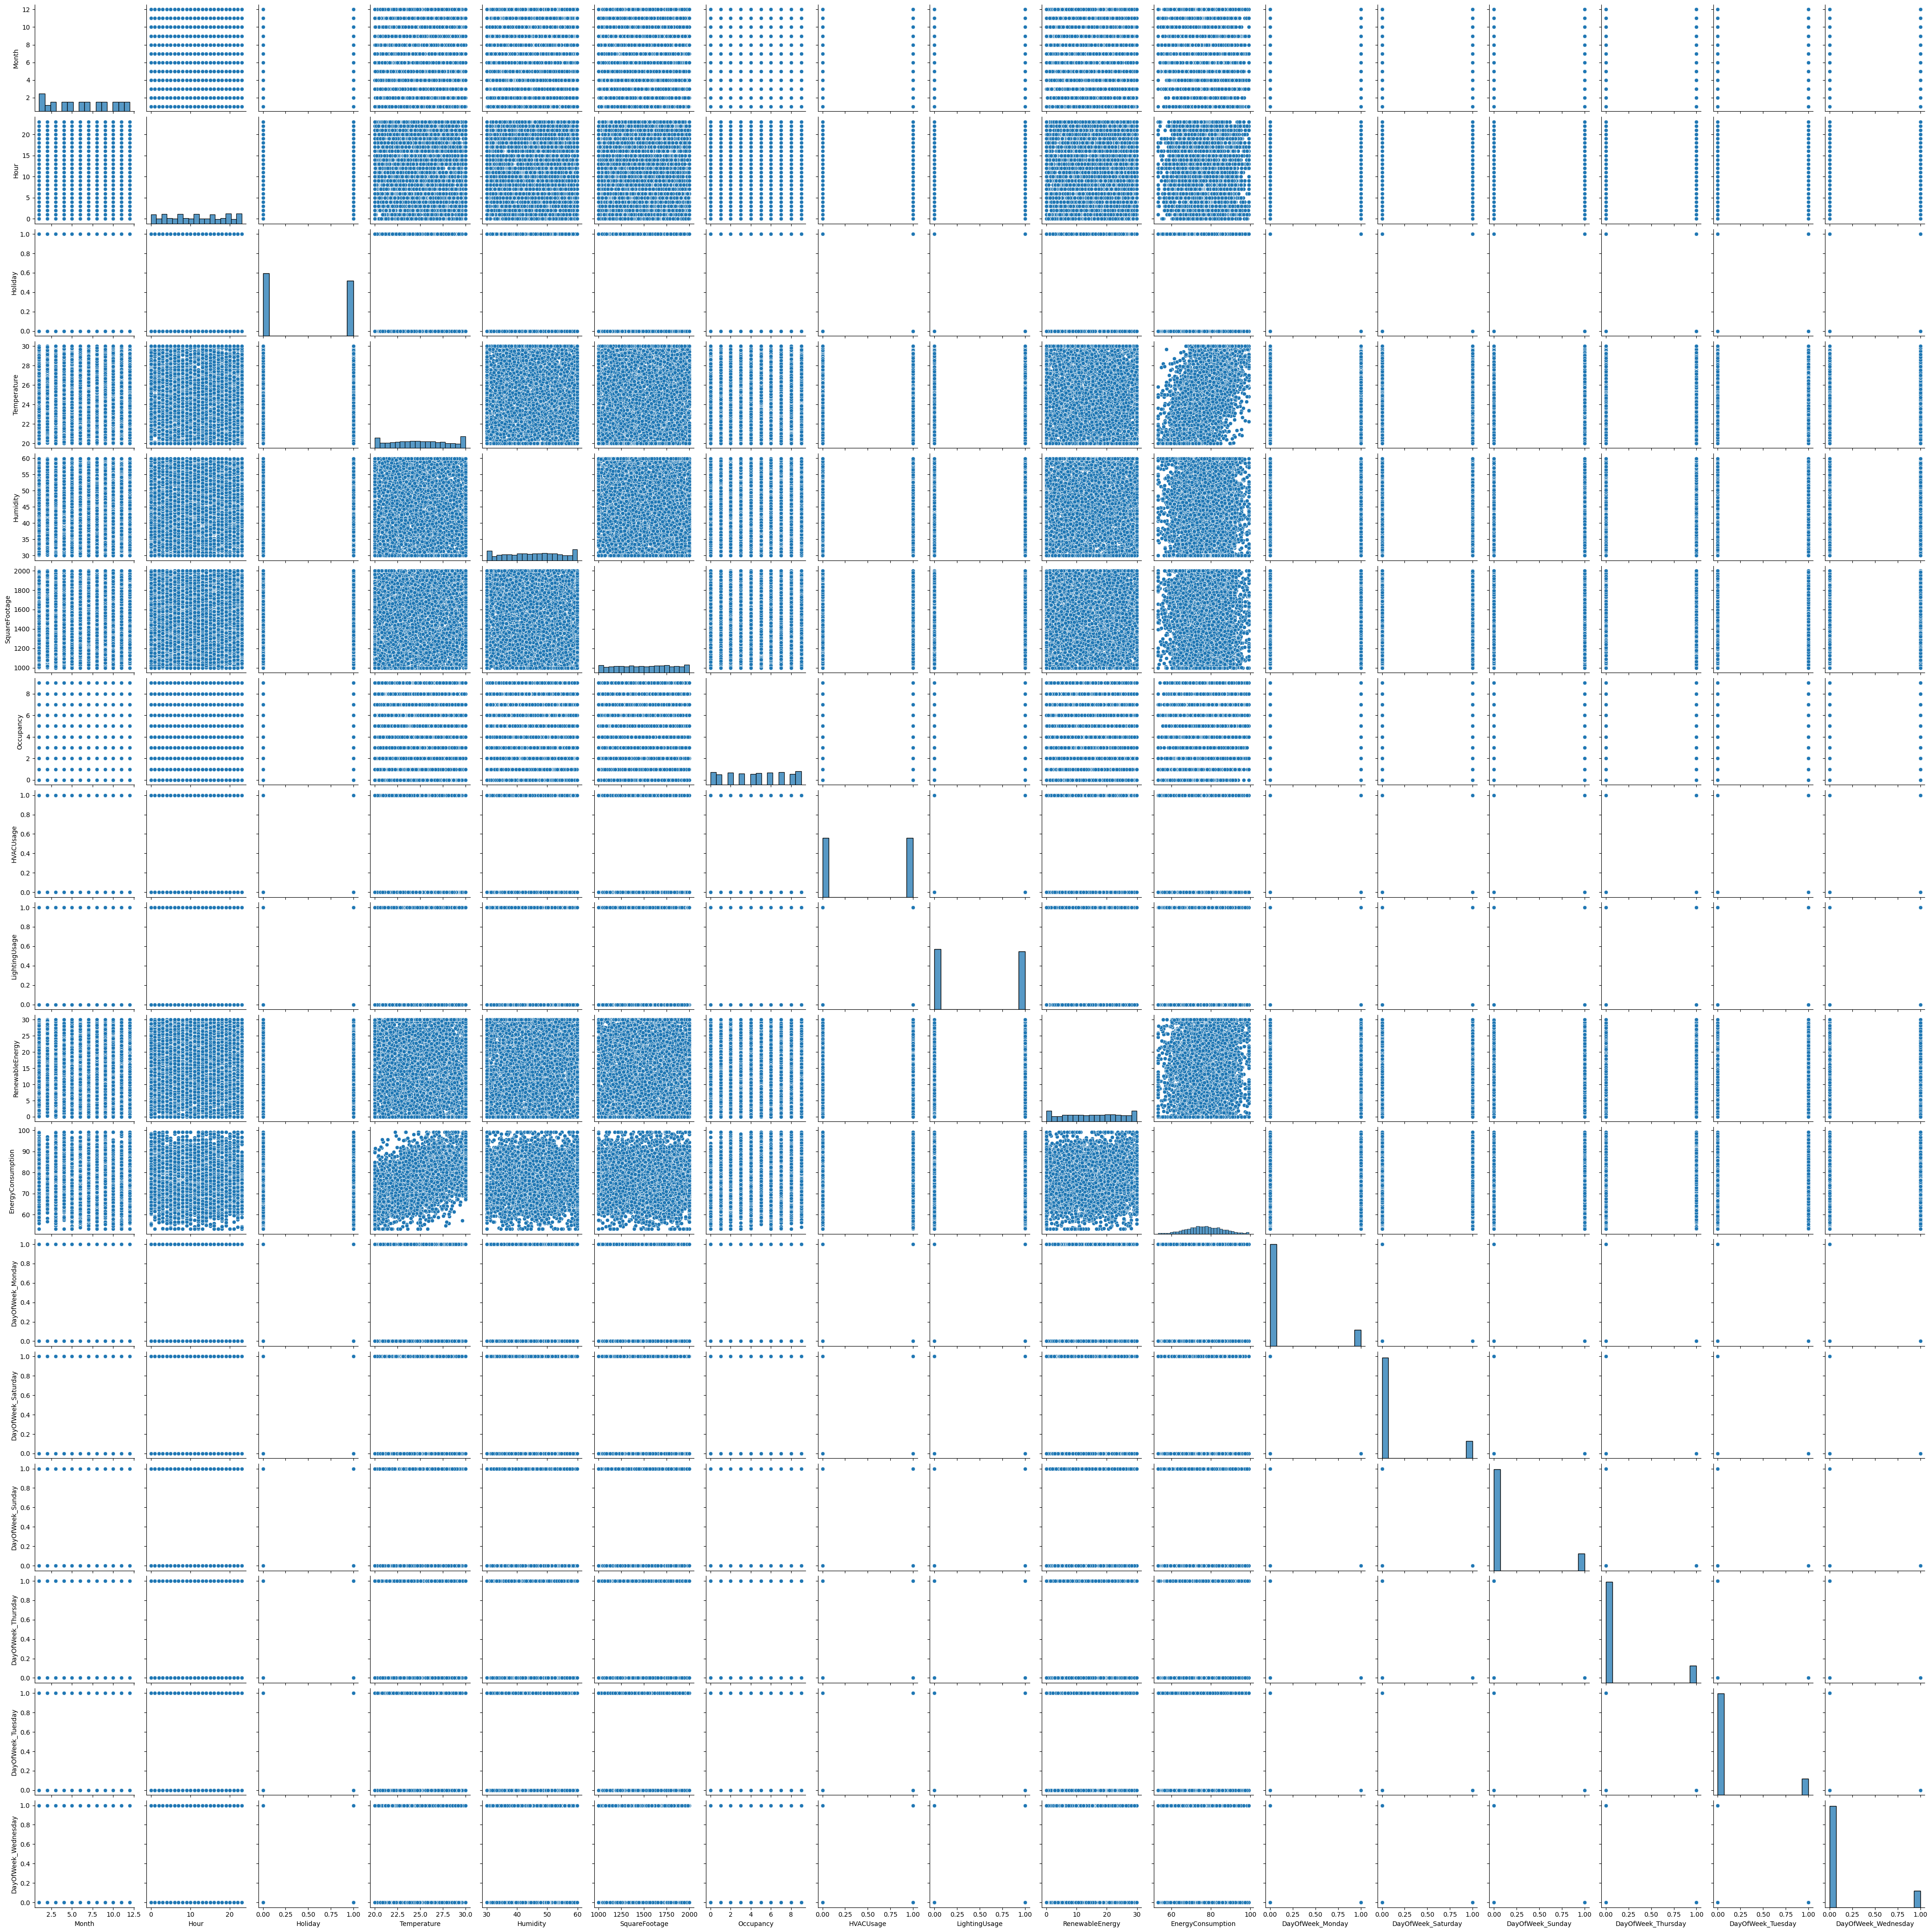

In [37]:
sns.pairplot(data_encoded_fin)

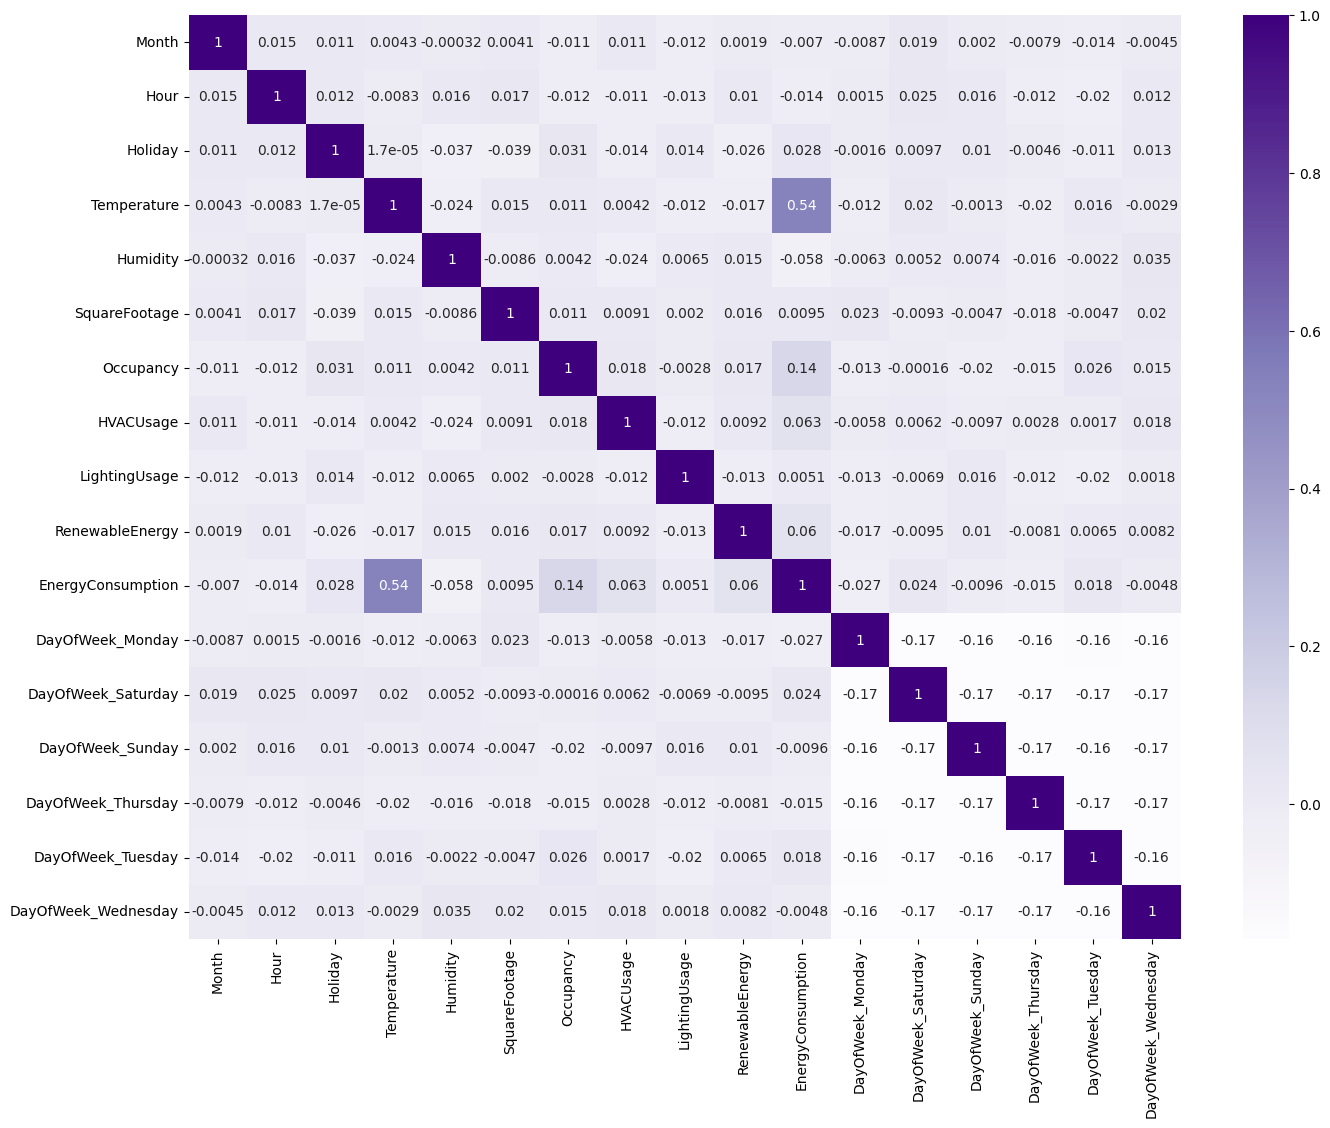

In [38]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_encoded_fin.corr(), annot=True, cmap="Purples")
plt.show()

**A low correlation suggests that Month, Hour, DayOfWeek, and other features don’t strongly predict EnergyConsumption using basic linear relationships. Temperature shows to be the strongest relationship to energy consumptiom. Lets see if this remains true even if Month, Hour and Day of week columns are removed.**

### Correlation without Month, Hour and Day of Week columns 

In [39]:
colums_to_drop = ["Month", "Hour", "DayOfWeek" ]
data_filtered = data.drop(columns = colums_to_drop)
data_filtered

Holiday  Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  \
0           0    25.139433  43.431581    1565.693999          5          1   
1           0    27.731651  54.225919    1411.064918          1          1   
2           0    28.704277  58.907658    1755.715009          2          0   
3           0    20.080469  50.371637    1452.316318          1          0   
4           0    23.097359  51.401421    1094.130359          9          1   
...       ...          ...        ...            ...        ...        ...   
4995        1    26.338718  52.580000    1563.567259          7          1   
4996        0    20.007565  42.765607    1999.982252          5          0   
4997        1    26.226253  30.015975    1999.982252          5          0   
4998        1    24.673206  50.223939    1240.811298          2          1   
4999        1    25.802872  41.798829    1793.658686          6          0   

      LightingUsage  RenewableEnergy  EnergyConsumption  
0                 0         2.774699          75.364373  
1                 1        21.831384          83.401855  
2                 0         6.764672          78.270888  
3                 1         8.623447          56.519850  
4                 0         3.071969          70.811732  
...             ...              ...                ...  
4995              1        20.591717          70.270344  
4996              1         7.536319          73.943071  
4997              1        28.162193          85.784613  
4998              1        20.918483          63.784001  
4999              0         8.334079          53.263278  

[5000 rows x 9 columns]

In [40]:
data_filtered.corr()

Holiday  Temperature  Humidity  SquareFootage  Occupancy  \
Holiday            1.000000     0.000017 -0.037460      -0.038658   0.031150   
Temperature        0.000017     1.000000 -0.024320       0.015372   0.011087   
Humidity          -0.037460    -0.024320  1.000000      -0.008551   0.004232   
SquareFootage     -0.038658     0.015372 -0.008551       1.000000   0.010907   
Occupancy          0.031150     0.011087  0.004232       0.010907   1.000000   
HVACUsage         -0.014428     0.004243 -0.023583       0.009087   0.018308   
LightingUsage      0.013756    -0.011924  0.006524       0.001986  -0.002785   
RenewableEnergy   -0.026405    -0.017275  0.015361       0.015922   0.016608   
EnergyConsumption  0.028278     0.535338 -0.057593       0.009470   0.139919   

                   HVACUsage  LightingUsage  RenewableEnergy  \
Holiday            -0.014428       0.013756        -0.026405   
Temperature         0.004243      -0.011924        -0.017275   
Humidity           -0.023583       0.006524         0.015361   
SquareFootage       0.009087       0.001986         0.015922   
Occupancy           0.018308      -0.002785         0.016608   
HVACUsage           1.000000      -0.011602         0.009191   
LightingUsage      -0.011602       1.000000        -0.013242   
RenewableEnergy     0.009191      -0.013242         1.000000   
EnergyConsumption   0.063065       0.005100         0.060490   

                   EnergyConsumption  
Holiday                     0.028278  
Temperature                 0.535338  
Humidity                   -0.057593  
SquareFootage               0.009470  
Occupancy                   0.139919  
HVACUsage                   0.063065  
LightingUsage               0.005100  
RenewableEnergy             0.060490  
EnergyConsumption           1.000000

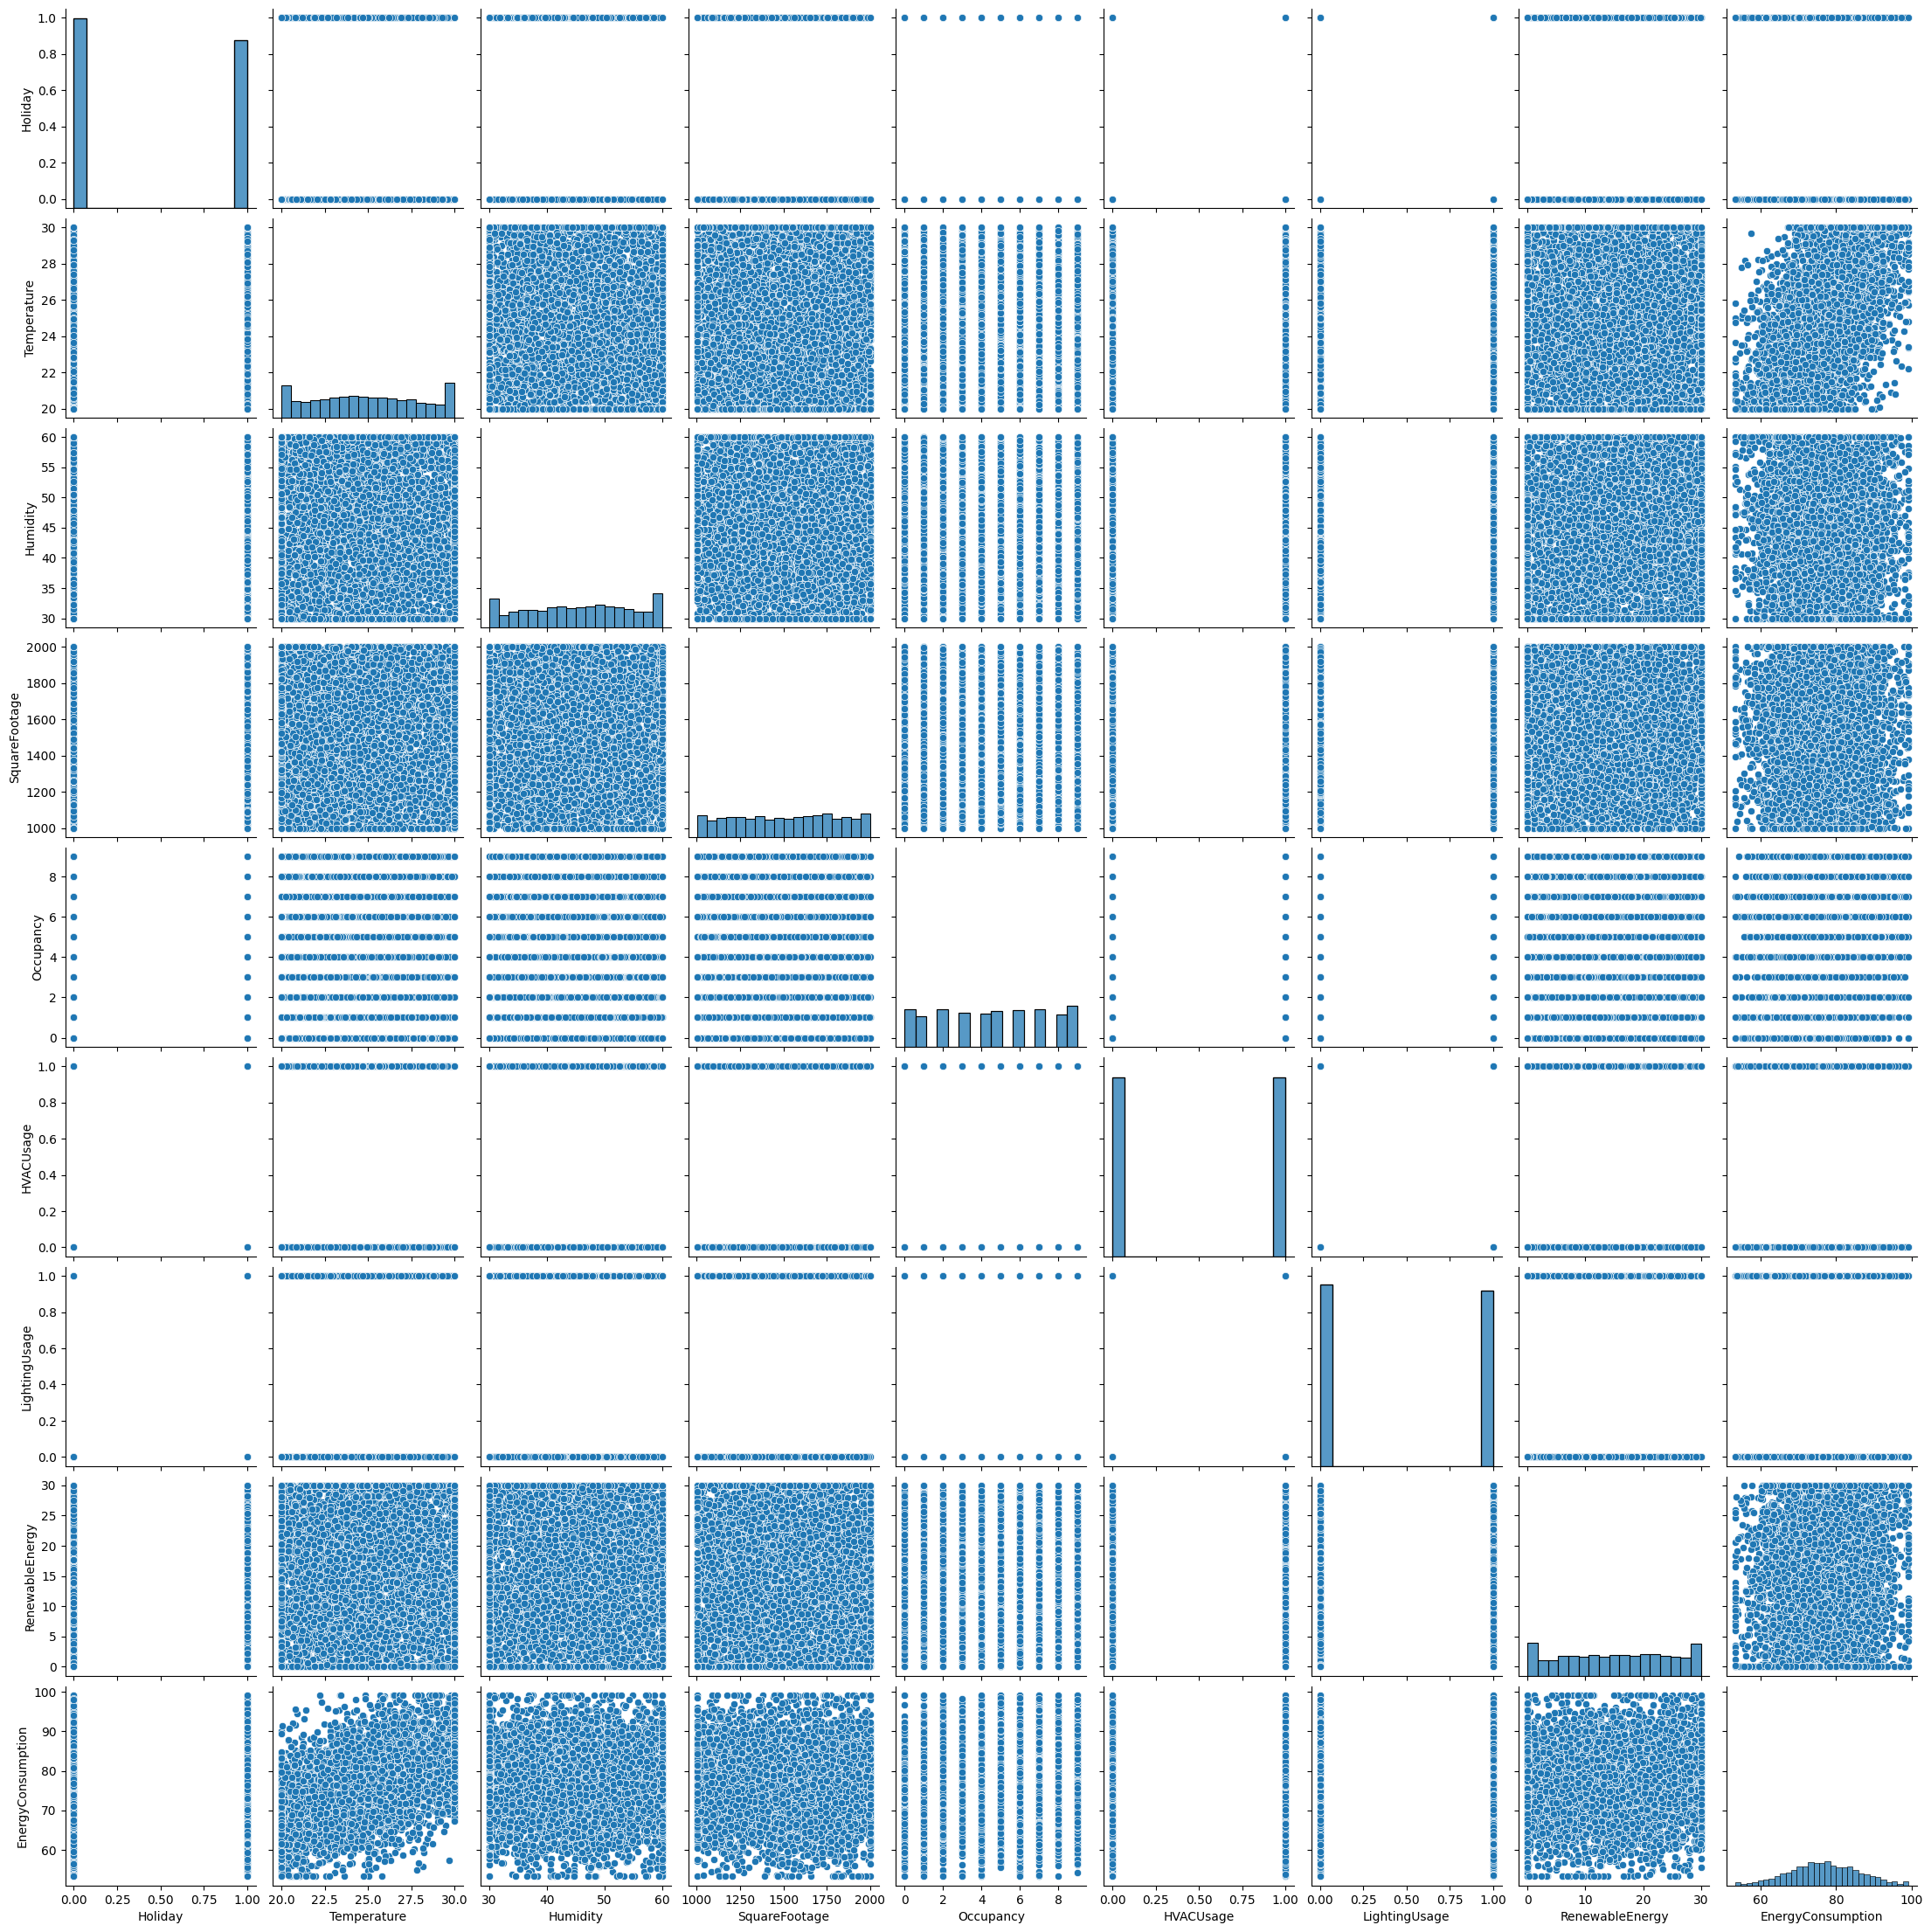

In [41]:
sns.pairplot(data_filtered)

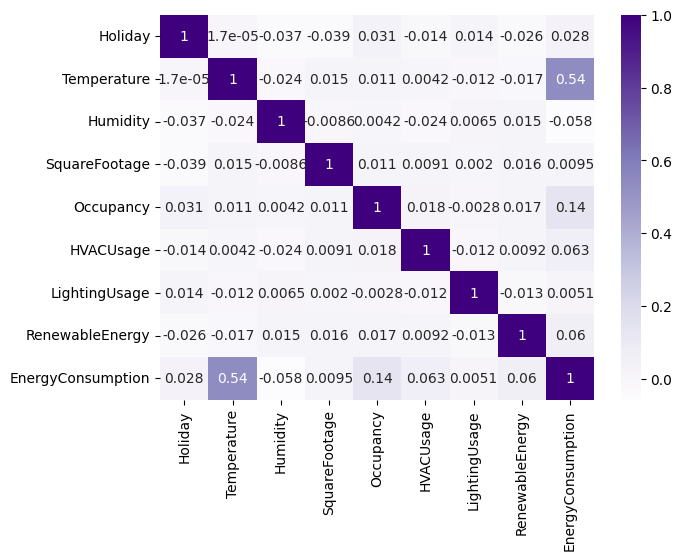

In [42]:
plt.figure(figsize=(7, 5))
sns.heatmap(data_filtered.corr(), annot=True, cmap="Purples")
plt.show()

**The correlations without the three columns showed the same results. All the other columns have weak correlations, whether positive or negative. They remain weak except for temperature, which has a correlation of 0.54. Other than temperature occupancyhad a weak possitive correlation at 0.14.**

- Higher temperatures might drive up HVAC usage, impacting energy consumption significantly.
- More people using a space could lead to increased lighting, HVAC usage, and overall energy demand.

### Exploring Temperature and Occupancy Features

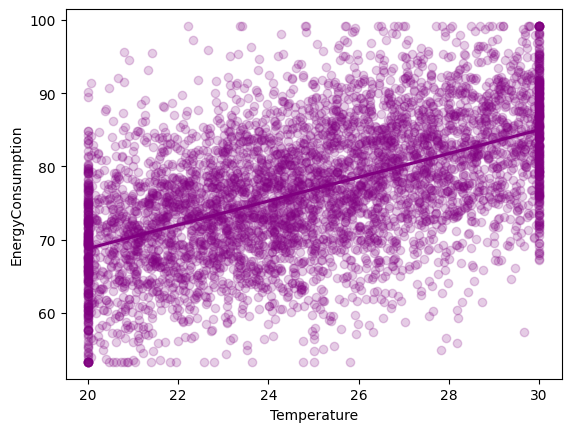

In [43]:
sns.regplot(x=data_encoded_fin["Temperature"], y=data_encoded_fin["EnergyConsumption"], color="purple", scatter_kws={"alpha": 0.2})
plt.show()


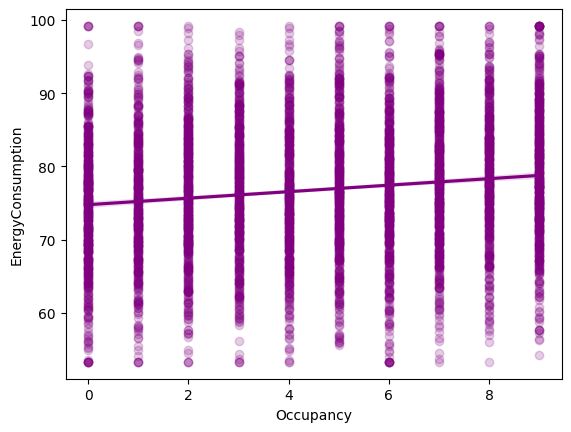

In [44]:
sns.regplot(x=data_encoded_fin["Occupancy"], y=data_encoded_fin["EnergyConsumption"], color="purple", scatter_kws={"alpha": 0.2})
plt.show()

**Comparing these two plots helped me determine that the best predictor for energy consumption is definitely Temperature, not Occupancy. Despite the heatmap indicating a weak relationship, the scatter plot revealed that Occupancy shows no clear correlation with Energy Consumption. This is because Occupancy measures the count of people per square footage—a discrete rather than a continuous variable. The nature of discrete data can impact modeling approaches and how effectively a feature contributes to predictions.**

**This investigation has also helped me avoid bias in feature selection. Initially, I considered several predictors for EnergyConsumption, including Square Footage, Month, Hour, DayOfWeek, Temperature, Humidity, and Occupancy. However, after conducting correlation analysis and visualizing the data with a heatmap, I realized that most features had weak relationships with EnergyConsumption, except for Temperature. This helped refine my approach, ensuring that my model focuses on variables with meaningful impact rather than assumptions about which features should be predictive.**

### Hypothesis Testing 

**Null Hypothesis (H₀): There is no true correlation between Temperature and Energy Consumption. Any observed correlation is due to random chance.**

**Alternative Hypothesis (H₁): There is a significant correlation between Temperature and Energy Consumption, meaning the relationship is not due to chance.**

**Statistical Test Choosen : pearsonr() Method in SciPy**

In [45]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data_encoded_fin["Temperature"], data_encoded_fin["EnergyConsumption"])
print(correlation)
print(p_value)

0.5353384971223776
0.0


**This low p value of 0.0 indicates that we can reject the null hypothesis and accept the alternative hypothesis that correlation between temperature and energy consumption did not occur by chance. We can continue our analysis with Temperature ad the key perdictor variable.**